# BrainStation Data Science Final Project - Emma Bahlke
## Helpfulness of Glassdoor Reviews
### March 19, 2019

## Outline
1. Data Import & Overview
2. Data Cleaning
3. Potential Hypotheses
4. Data Visualization & Initial Insights
5. Modeling & Validation
6. Conclusions

## 1. Data Import & Overview

The dataset I chose was a set of approximately 67,000 Glassdoor reviews for major tech companies (Google, Apple, Facebook, etc.), sourced from [Kaggle](https://www.kaggle.com/petersunga/google-amazon-facebook-employee-reviews).  The dataset contains information on the company and location, the date of the review, the person's job title, as well as all of the review text data (summary, pros, cons, and advice to management) and star-out-of-five ratings (overall, work balance, career opportunities, etc.).  Finally, it includes the number of times each review was voted to be helpful.

In the course of this notebook, I will largely be ignoring the company and job title.  It's that last data point (helpfulness of the review) in which I'm interested, moreso than trends in employee satisfaction across different companies or job types.  Fundamentally, I'm hoping to explore the question: what makes a Glassdoor review helpful?

In [1]:
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plt

data = pandas.read_csv('employee_reviews.csv', index_col=0, parse_dates=[2])
data.head()

,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,carrer-opportunities-stars,comp-benefit-stars,senior-mangemnet-stars,helpful-count,link
1,google,none,"Dec 11, 2018",Current Employee - Anonymous Employee,Best Company to work for,People are smart and friendly,Bureaucracy is slowing things down,none,5.0,4.0,5.0,5.0,4.0,5.0,0,https://www.glassdoor.com/Reviews/Google-Revie...
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
5,google,"Los Angeles, CA","Jul 19, 2018",Former Employee - Software Engineer,"Unique, one of a kind dream job",Google is a world of its own. At every other c...,"If you don't work in MTV (HQ), you will be giv...",Promote managers into management for their man...,5.0,5.0,5.0,5.0,5.0,5.0,49,https://www.glassdoor.com/Reviews/Google-Revie...


In [2]:
data.dtypes

company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars             object
culture-values-stars           object
carrer-opportunities-stars     object
comp-benefit-stars             object
senior-mangemnet-stars         object
helpful-count                   int64
link                           object
dtype: object

Immediately, we see a number of issues with the data that will have to be cleaned up: except for "overall-ratings", all of the "-stars" values are object, not float, and a number of the columns are grossly misspelled (carrer-opportunities, senior-mangemnet).

Note also that parse_dates doesn't seem to be working and the 'dates' column is still being parsed as an object.  I'm going to disregard this for now since I don't intend to use the dates column in my analysis.

Before we get to full data cleaning, let's see if there are any obvious outliers in the overall-ratings or helpful-count:

In [3]:
data.describe()

,overall-ratings,helpful-count
count,67529.000000,67529.000000
mean,3.826075,1.268211
std,1.154989,16.085852
min,1.000000,0.000000
25%,3.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,1.000000
max,5.000000,2094.000000


Luckily, this doesn't seem to be the case - there are no rows with e.g. a negative helpful-count, overall-ratings greater than 5, etc.  But we'll do some double-checking in the next section.

Finally, let's familiarize ourselves with the distribution of the data per star rating:

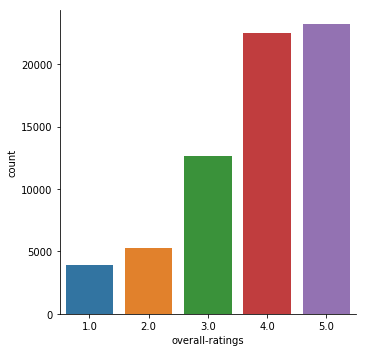

In [4]:
seaborn.catplot(data=data, x='overall-ratings', kind = 'count')

It seems the Glassdoor reviews are pretty overwhelmingly positive, with less than 20% falling into the 1 or 2 star category.  Just for fun, how do the different companies stack up?

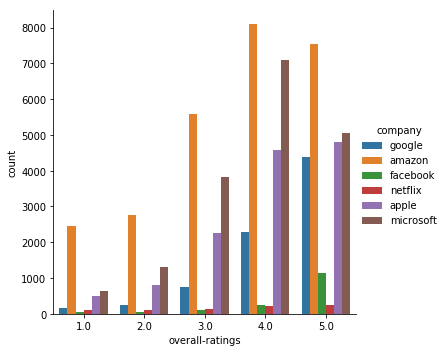

In [5]:
seaborn.catplot(data=data, x='overall-ratings', kind='count', hue='company')

## 2. Data Cleaning

We'll start with some basic column cleanup:

In [6]:
data = data.rename(columns={'carrer-opportunities-stars': 'career-opportunities-stars',
                           'senior-mangemnet-stars': 'senior-management-stars'})
data['work-balance-stars'] = pandas.to_numeric(data['work-balance-stars'], errors='coerce')
data['culture-values-stars'] = pandas.to_numeric(data['culture-values-stars'], errors='coerce')
data['career-opportunities-stars'] = pandas.to_numeric(data['career-opportunities-stars'], errors='coerce')
data['comp-benefit-stars'] = pandas.to_numeric(data['comp-benefit-stars'], errors='coerce')
data['senior-management-stars'] = pandas.to_numeric(data['senior-management-stars'], errors='coerce')

data.dtypes

company                        object
location                       object
dates                          object
job-title                      object
summary                        object
pros                           object
cons                           object
advice-to-mgmt                 object
overall-ratings               float64
work-balance-stars            float64
culture-values-stars          float64
career-opportunities-stars    float64
comp-benefit-stars            float64
senior-management-stars       float64
helpful-count                   int64
link                           object
dtype: object

While cleaning the data, I discovered that the specific "-stars" values were read in as objects initially because they are optional fields in Glassdoor, and the original data rows had a mix of numerical values and the string "none".  Now, any review where the specific "-stars" were not provided should have a value of NaN and the entire column is a (nullable) float64.

Let's check exactly how many reviews have specific star values for the various subsections:

% provided work balance stars: 89.4
% provided culture values stars: 79.94
% provided career opportunities stars: 89.47
% provided comp benefits stars: 89.4
% provided senior management stars: 88.49

Visualization:


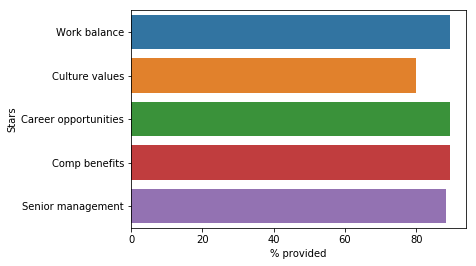

In [7]:
total_rows = len(data)
percent_wb_stars = 100 - round(pandas.isna(data['work-balance-stars']).sum()/total_rows * 100, 2)
percent_cv_stars = 100 - round(pandas.isna(data['culture-values-stars']).sum()/total_rows * 100, 2)
percent_co_stars = 100 - round(pandas.isna(data['career-opportunities-stars']).sum()/total_rows * 100, 2)
percent_cb_stars = 100 - round(pandas.isna(data['comp-benefit-stars']).sum()/total_rows * 100, 2)
percent_sm_stars = 100 - round(pandas.isna(data['senior-management-stars']).sum()/total_rows * 100, 2)

print('% provided work balance stars: {}'.format(percent_wb_stars))
print('% provided culture values stars: {}'.format(percent_cv_stars))
print('% provided career opportunities stars: {}'.format(percent_co_stars))
print('% provided comp benefits stars: {}'.format(percent_cb_stars))
print('% provided senior management stars: {}'.format(percent_sm_stars))
print('\nVisualization:')

all_percentages = pandas.DataFrame(data = {'Stars': ['Work balance', 'Culture values', 'Career opportunities', 'Comp benefits', 'Senior management'],
                                           '% provided': [percent_wb_stars, percent_cv_stars, percent_co_stars, percent_cb_stars, percent_sm_stars]})

seaborn.barplot(x="% provided", y="Stars", data=all_percentages)

So we can see that the vast majority of our data has stars for each sub-category.

Let's also make sure there are no NaN values in overall-ratings or helpful-count:

In [8]:
pandas.isna(data['overall-ratings']).sum()

0

In [9]:
pandas.isna(data['helpful-count']).sum()

0

The last thing I want to check is if there are any obvious outliers in helpful-count:

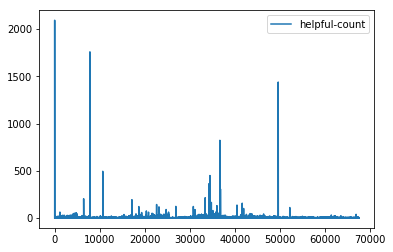

In [10]:
data[['helpful-count']].plot()

Here we do see about four or five datapoints that look like potential spikes.  They might still be valid and just represent particularly stellar Glassdoor reviews - but it's worth checking up on.  The helpful-count mean is about 1.26, which is going to be much too low to distinguish "highly helpful reviews", but on a rough visual inspection, a good lower bound would be about 450:

In [11]:
highly_helpful_reviews = data[data['helpful-count'] > 450]
print('There are {} highly helpful reviews:'.format(len(highly_helpful_reviews)))
highly_helpful_reviews

There are 10 highly helpful reviews:


,company,location,dates,job-title,summary,pros,cons,advice-to-mgmt,overall-ratings,work-balance-stars,culture-values-stars,career-opportunities-stars,comp-benefit-stars,senior-management-stars,helpful-count,link
2,google,"Mountain View, CA","Jun 21, 2013",Former Employee - Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Work/life balance. What balance? All those ...,1) Don't dismiss emotional intelligence and ad...,4.0,2.0,3.0,3.0,5.0,3.0,2094,https://www.glassdoor.com/Reviews/Google-Revie...
3,google,"New York, NY","May 10, 2014",Current Employee - Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...","* It *is* becoming larger, and with it comes g...",Keep the focus on the user. Everything else wi...,5.0,5.0,4.0,5.0,5.0,4.0,949,https://www.glassdoor.com/Reviews/Google-Revie...
4,google,"Mountain View, CA","Feb 8, 2015",Current Employee - Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,I live in SF so the commute can take between 1...,Keep on NOT micromanaging - that is a huge ben...,5.0,2.0,5.0,5.0,4.0,5.0,498,https://www.glassdoor.com/Reviews/Google-Revie...
7820,amazon,"Phoenix, AZ",None,Current Employee - Software Development Manager,An Amazing Place to Work,"I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...",none,5.0,4.0,5.0,5.0,5.0,5.0,580,https://www.glassdoor.com/Reviews/Amazon-Revie...
7822,amazon,"Seattle, WA","Jan 10, 2016",Current Employee - Anonymous Employee,You Get What You Put In,"Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,More on-boarding training before new employees...,5.0,4.0,5.0,5.0,5.0,5.0,1759,https://www.glassdoor.com/Reviews/Amazon-Revie...
7823,amazon,"Seattle, WA","Feb 20, 2016",Current Employee - Senior Engineering Manager,"Exciting Work, Abusive Culture","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...",Don't pretend that the recent NY Times article...,3.0,3.0,3.0,3.0,4.0,4.0,1404,https://www.glassdoor.com/Reviews/Amazon-Revie...
7824,amazon,"Seattle, WA","Dec 17, 2013",Current Employee - Software Development Manager,"Can be amazing for some people, horrible for o...",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Stack ranking is a horrible practice since it'...,4.0,3.0,3.0,5.0,5.0,4.0,1275,https://www.glassdoor.com/Reviews/Amazon-Revie...
10669,amazon,"Seattle, WA","Sep 19, 2014",Current Employee - Software Development Engineer,A huge diverse high tech company with all sort...,Disclaimer: My opinions reflect that of an SDE...,Beware of bad managers and horrible team mates...,The thing about thinking long-term is getting ...,4.0,NaN,NaN,NaN,NaN,NaN,494,https://www.glassdoor.com/Reviews/Amazon-Revie...
36651,apple,none,"Aug 28, 2014",Current Employee - Anonymous Employee,"Challenging, Rewarding, but ZERO work/life bal...","We work with geniuses - in every department, W...",ZERO ZERO ZERO work/life balance. Execs have b...,none,4.0,1.0,3.0,3.0,3.0,3.0,822,https://www.glassdoor.com/Reviews/Apple-Review...
49601,microsoft,"Redmond, WA","Jan 28, 2013",Current Employee - Anonymous Employee,Thoughts after 10 years....,"1. If you love tech, this is a great place. No...",Brand on Your Resume: After many years of losi...,I'll type it here - but I don't they are liste...,4.0,4.0,2.0,2.0,4.0,NaN,1439,https://www.glassdoor.com/Reviews/Microsoft-Re...


At a glance, none of these reviews seem like they should be disqualified due to the unusally high helpful-count.  They all have extensive feedback and, with one exception, star counts for all or almost all of the subsections.

## 3. Potential Hypotheses

The outliers provide a great jumping off point for thinking about what questions we might want to answer using this Glassdoor review data.  As stated in the introduction, my motivation for choosing the Glassdoor dataset was my interest in: what makes a helpful review?  My own tendency when reading Glassdoor reviews is to immediately zero in on the negative ones, probably because I'm a very risk-averse person.  I would hate to go through a whole interviewing process, start a new job, etc., only to find out that I'm in a bad situation - so I pay close attention to the negative experiences and feedback of others, hoping to assess if the same thing would be likely to happen to me.

So my initial thought was, is there a link between helpfulness and average rating?  Are "here's the dirt" negative reviews more likely to be rated as helpful?  However, the exceptionally helpful reviews are already casting some doubt on that possibility, given that the lowest super-helpful review has an overall rating of 3 stars.  But what about the subsection stars, such as work balance?  There's a handful of highly helpful reviews with 1 and 2 star feedback here, so maybe that's an area worth pursuing.

The other dimension I'd like to explore is the possible link between the feedback itself and the helpfulness.  Are longer or shorter reviews more likely to be rated as helpful?  Can we do some sort of deeper textual analysis?

With that in mind, let's dig in and start visualizing the data.

## 4. Data Visualization & Initial Insights

Note that due to the discrete (as opposed to continuous) nature of the data (i.e. the fact that almost all of the numerical values are star-out-of-five categories), `seaborn.pairplot()` wasn't particularly helpful for getting an overview of the data and its relationships.

Another issue which quickly became apparent was that those "exceptionally helpful" reviews skewed the arithmetic mean so high as to be almost meaningless.  To illustrate:

In [12]:
above_average_helpfulness = pandas.DataFrame(data = {'Star rating': [1, 2, 3, 4, 5],
                                                     'Above average reviews': [(data[data['overall-ratings'] == 1.0]['helpful-count'] > 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 2.0]['helpful-count'] > 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 3.0]['helpful-count'] > 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 4.0]['helpful-count'] > 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 5.0]['helpful-count'] > 1.268211).sum()]})

below_average_helpfulness = pandas.DataFrame(data = {'Star rating': [1, 2, 3, 4, 5],
                                                     'Below average reviews': [(data[data['overall-ratings'] == 1.0]['helpful-count'] < 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 2.0]['helpful-count'] < 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 3.0]['helpful-count'] < 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 4.0]['helpful-count'] < 1.268211).sum(),
                                                                               (data[data['overall-ratings'] == 5.0]['helpful-count'] < 1.268211).sum()]})

print("{}% of reviews are above average in helpfulness".format(round(above_average_helpfulness['Above average reviews'].sum()/len(data) * 100, 2)))
print("{}% of reviews are below average in helpfulness".format(round(below_average_helpfulness['Below average reviews'].sum()/len(data) * 100, 2)))

17.77% of reviews are above average in helpfulness
82.23% of reviews are below average in helpfulness


This made the relationship between helpfulness and overall rating somewhat challenging to investigate, but I did my best and present my findings below.

### Helpfulness vs. overall rating

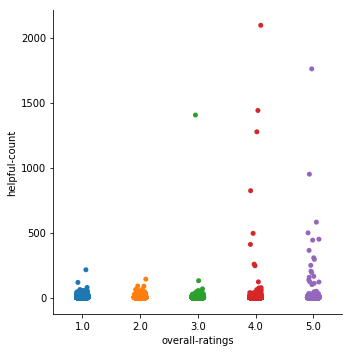

In [13]:
seaborn.catplot(x="overall-ratings", y="helpful-count", data=data)

With a quick catplot, we immediately see the high number of "exceptionally helpful" reviews contained within the 4 or 5-star category, which we already knew about.  But what about the "average helpfulness" of each category?

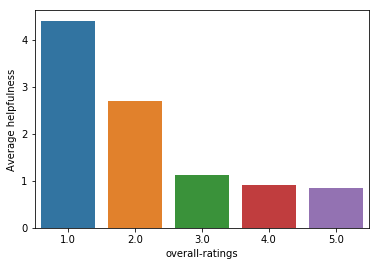

In [14]:
helpful_by_ratings_mean = data.groupby('overall-ratings')['helpful-count'].agg('mean')
helpful_by_ratings_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_ratings_mean, x=helpful_by_ratings_mean.index)

Here it looks like my instinct is being vindicated - the average helpfulness of 1 and 2 star reviews is **much** higher than that of 3, 4, and 5 star reviews.  In fact, it's almost suspiciously high.  How can this be, if the 4 and 5 star reviews contain so many of those extremely-helpful outliers?  Is this data skewed somehow due to the distorted arithmetic mean?  Let's try to compare apples to apples and take a look at the distribution of above-average and below-average helpful reviews in each star category:

In [15]:
below_average_helpfulness = below_average_helpfulness.set_index('Star rating')
below_average_helpfulness['Percent share'] = round(below_average_helpfulness['Below average reviews']/below_average_helpfulness['Below average reviews'].sum() * 100, 2)
below_average_helpfulness

,Below average reviews,Percent share
Star rating,,
1,1623,2.92
2,3016,5.43
3,10204,18.38
4,19963,35.95
5,20720,37.32


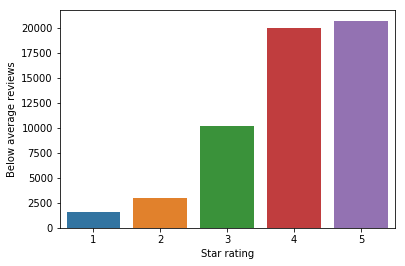

In [16]:
seaborn.barplot(x=below_average_helpfulness.index, y="Below average reviews", data=below_average_helpfulness)

In [17]:
above_average_helpfulness = above_average_helpfulness.set_index('Star rating')
above_average_helpfulness['Percent share'] = round(above_average_helpfulness['Above average reviews']/above_average_helpfulness['Above average reviews'].sum() * 100, 2)
above_average_helpfulness

,Above average reviews,Percent share
Star rating,,
1,2283,19.02
2,2266,18.88
3,2449,20.40
4,2535,21.12
5,2470,20.58


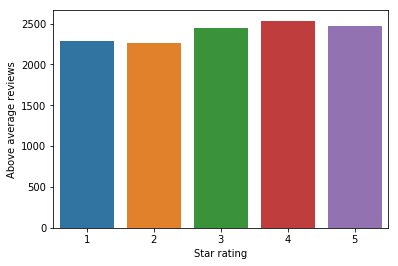

In [18]:
seaborn.barplot(x=above_average_helpfulness.index, y="Above average reviews", data=above_average_helpfulness)

#### Conclusions
Although the 4 and 5 star reviews have the lion's share of exceptionally-helpful reviews (i.e. many standard deviations above the mean), the proportion of _overall_ above-average reviews is pretty equal among the five star categories, around 20% each.  Meanwhile, 3/4/5 star reviews have a significantly higher proportion of _below-average_ reviews than 1 and 2 star reviews, which account for less than 9% of below-average reviews total.  In other words, reviews with high ratings are more likely to be _very_ popular - but also much more likely to have only 0 or 1 vote(s) for helpfulness.

This suggests that perhaps a review is more likely to be _not rated helpful_ if it has 3 stars or above, but frankly the data is unclear enough that I don't have high confidence in training any model to predict helpfulness or lack thereof based on overall rating.

### Helpfulness vs. sub-rating

Well, what about the star ratings in each subsection?

First, since we have a mix of integer values and NaN in all of the sub-rating columns, let's separate those out into two groups each and reason about them separately:

In [19]:
wb_stars_provided = data[pandas.notna(data['work-balance-stars'])]
wb_stars_not_provided = data[pandas.isna(data['work-balance-stars'])]

cv_stars_provided = data[pandas.notna(data['culture-values-stars'])]
cv_stars_not_provided = data[pandas.isna(data['culture-values-stars'])]

co_stars_provided = data[pandas.notna(data['career-opportunities-stars'])]
co_stars_not_provided = data[pandas.isna(data['career-opportunities-stars'])]

cb_stars_provided = data[pandas.notna(data['comp-benefit-stars'])]
cb_stars_not_provided = data[pandas.isna(data['comp-benefit-stars'])]

sm_stars_provided = data[pandas.notna(data['senior-management-stars'])]
sm_stars_not_provided = data[pandas.isna(data['senior-management-stars'])]

For the reviews where subsection ratings were not provided, can we deduce anything about the helpfulness?  Let's do some plotting and see if the helpfulness values seem to be clustered around a particular level, or if they're all over the place.

#### Helpfulness of NaN work balance stars

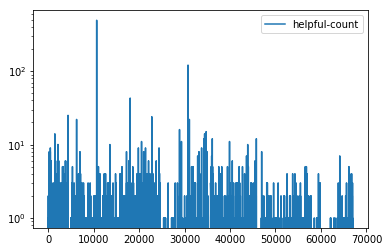

In [20]:
wb_stars_not_provided[['helpful-count']].plot()
plt.yscale('log')

#### Helpfulness of NaN culture values stars

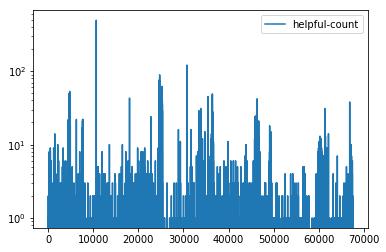

In [21]:
cv_stars_not_provided[['helpful-count']].plot()
plt.yscale('log')

#### Helpfulness of NaN career opportunity stars

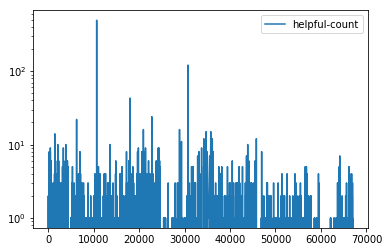

In [22]:
co_stars_not_provided[['helpful-count']].plot()
plt.yscale('log')

#### Helpfulness of NaN comp benefits stars

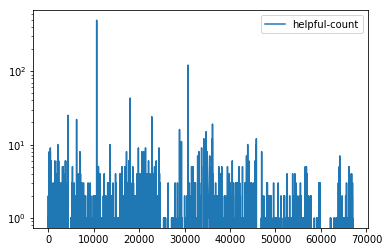

In [23]:
cb_stars_not_provided[['helpful-count']].plot()
plt.yscale('log')

#### Helpfulness of NaN senior management stars

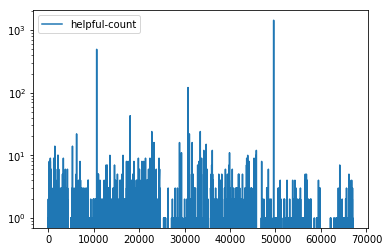

In [24]:
sm_stars_not_provided[['helpful-count']].plot()
plt.yscale('log')

#### Conclusions

Not really; the values seem to range a lot, even when normalized a bit using logarithms.  So next, let's plot the helpfulness by star rating for each subsection where data was provided:

#### Helpfulness by work balance stars

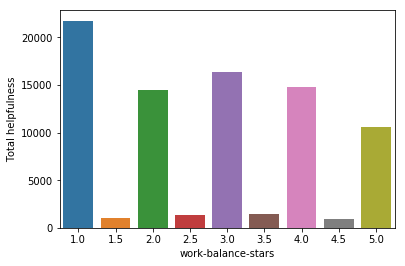

In [25]:
helpful_by_wb_counts = wb_stars_provided.groupby('work-balance-stars')['helpful-count'].agg('sum')
helpful_by_wb_counts.name = 'Total helpfulness'
seaborn.barplot(y=helpful_by_wb_counts, x=helpful_by_wb_counts.index)

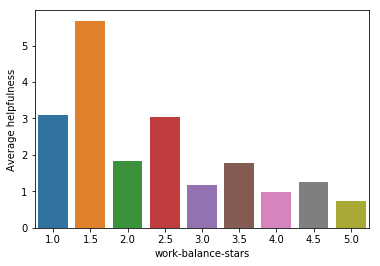

In [26]:
helpful_by_wb_mean = wb_stars_provided.groupby('work-balance-stars')['helpful-count'].agg('mean')
helpful_by_wb_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_wb_mean, x=helpful_by_wb_mean.index)

Note that for all of the subsections except culture values, the dataset includes some rows with half-star ratings (1.5, 2.5, etc.).  Since these are a very small proportion of the dataset (less than a percentage point each, for the most part), whereas the full-star ratings are more evenly distributed, the _total helpfulness sum_ is significantly lower for the half-star ratings whereas the _average helpfulness_ is significantly higher due to the small number of entries.

#### Helpfulness by culture values stars

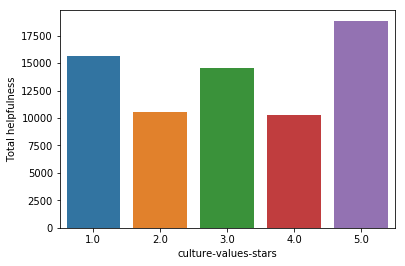

In [27]:
helpful_by_cv_counts = cv_stars_provided.groupby('culture-values-stars')['helpful-count'].agg('sum')
helpful_by_cv_counts.name = 'Total helpfulness'
seaborn.barplot(y=helpful_by_cv_counts, x=helpful_by_cv_counts.index)

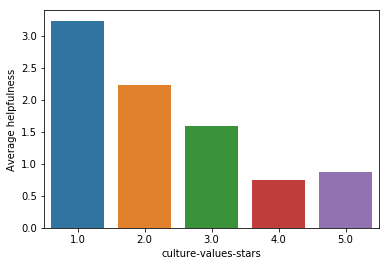

In [28]:
helpful_by_cv_mean = cv_stars_provided.groupby('culture-values-stars')['helpful-count'].agg('mean')
helpful_by_cv_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_cv_mean, x=helpful_by_cv_mean.index)

#### Helpfulness by career opportunity stars

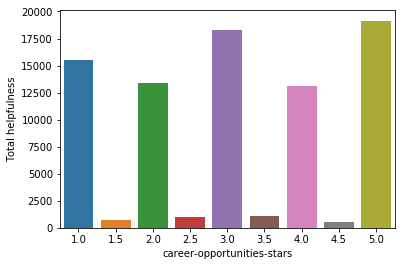

In [29]:
helpful_by_co_counts = co_stars_provided.groupby('career-opportunities-stars')['helpful-count'].agg('sum')
helpful_by_co_counts.name = 'Total helpfulness'
seaborn.barplot(y=helpful_by_co_counts, x=helpful_by_co_counts.index)

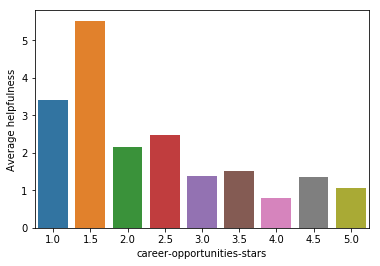

In [30]:
helpful_by_co_mean = co_stars_provided.groupby('career-opportunities-stars')['helpful-count'].agg('mean')
helpful_by_co_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_co_mean, x=helpful_by_co_mean.index)

#### Helpfulness by comp benefits stars

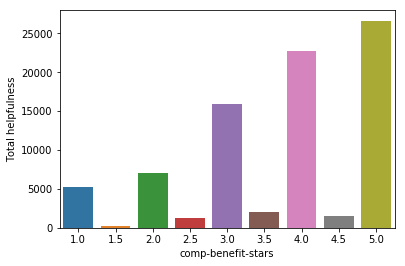

In [31]:
helpful_by_cb_counts = cb_stars_provided.groupby('comp-benefit-stars')['helpful-count'].agg('sum')
helpful_by_cb_counts.name = 'Total helpfulness'
seaborn.barplot(y=helpful_by_cb_counts, x=helpful_by_cb_counts.index)

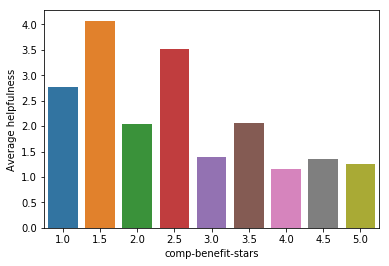

In [32]:
helpful_by_cb_mean = cb_stars_provided.groupby('comp-benefit-stars')['helpful-count'].agg('mean')
helpful_by_cb_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_cb_mean, x=helpful_by_cb_mean.index)

#### Helpfulness by senior management stars

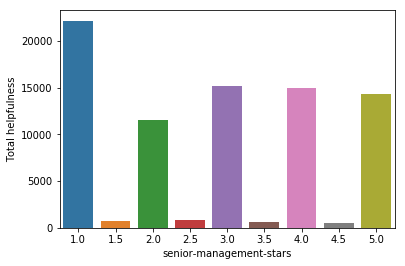

In [33]:
helpful_by_sm_counts = sm_stars_provided.groupby('senior-management-stars')['helpful-count'].agg('sum')
helpful_by_sm_counts.name = 'Total helpfulness'
seaborn.barplot(y=helpful_by_sm_counts, x=helpful_by_sm_counts.index)

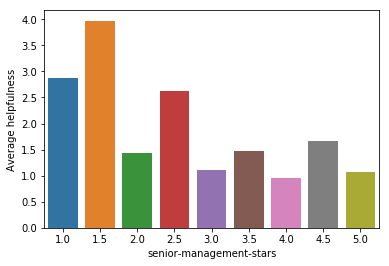

In [34]:
helpful_by_sm_mean = sm_stars_provided.groupby('senior-management-stars')['helpful-count'].agg('mean')
helpful_by_sm_mean.name = 'Average helpfulness'
seaborn.barplot(y=helpful_by_sm_mean, x=helpful_by_sm_mean.index)

#### Conclusions
There does seem to be some inverse relationship between number of sub-section stars and average helpfulness, similar to the overall rating.  I would have liked to have used some kind of correlation coefficient test to investigate the relationships more deeply, but couldn't figure out how to implement a correlation test between strictly categorical values (# of stars) and an integer value.  By visual inspection, though, the _strongest_ relationships seem to be with:
* Career opportunities
* Comp benefits
* Work balance

### Helpfulness vs. length of feedback
The last aspect I want to consider is whether or not the length of the feedback is correlated with helpfulness.  I could see this being either a positive or negative correlation - people are more likely to read and therefore endorse short reviews, _or_ people get more out of longer reviews and are more likely to endorse them.  Does such a relationship exist?

To start with, let's add columns indicating the length of each review's text features (except for summary, since this is intended to be a short title anyway):

In [35]:
data['pros-length'] = data['pros'].str.len()
data['cons-length'] = data['cons'].str.len()
data['advice-length'] = data['advice-to-mgmt'].str.len()

data[['pros-length', 'cons-length', 'advice-length']].head()

,pros-length,cons-length,advice-length
1,29,34,4.0
2,1048,2403,1004.0
3,3634,1064,56.0
4,1572,2614,295.0
5,8175,4694,333.0


In [36]:
data[['pros-length', 'cons-length', 'advice-length']].describe()

,pros-length,cons-length,advice-length
count,67529.000000,67529.000000,67232.000000
mean,127.954997,175.860978,75.991775
std,169.220416,321.067735,146.024889
min,8.000000,4.000000,1.000000
25%,46.000000,45.000000,4.000000
50%,79.000000,87.000000,21.000000
75%,149.000000,179.000000,100.000000
max,8175.000000,13407.000000,5702.000000


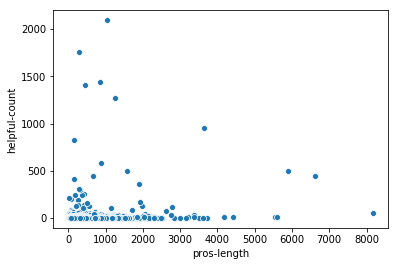

In [37]:
seaborn.scatterplot(data=data, x='pros-length', y='helpful-count')

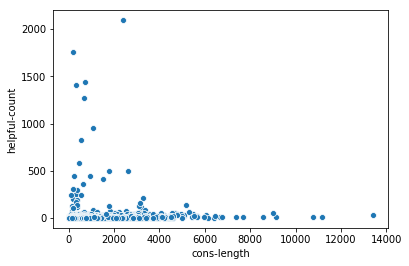

In [38]:
seaborn.scatterplot(data=data, x='cons-length', y='helpful-count')

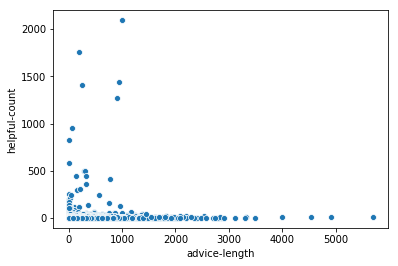

In [39]:
seaborn.scatterplot(data=data, x='advice-length', y='helpful-count')

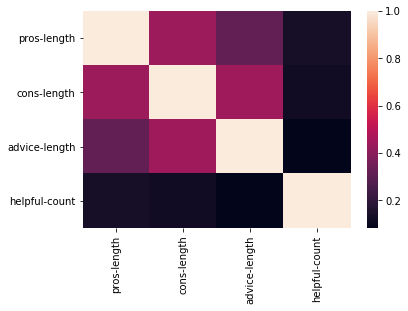

In [41]:
seaborn.heatmap(data[['pros-length', 'cons-length', 'advice-length', 'helpful-count']].corr())

#### Conclusions

EVerything strongly suggests there is no correlation between the helpful-count and the length of the advice.  The last aspect I'll explore in this project is whether or not we can predict helpfulness using basic textual analysis techniques, but that doesn't lend itself well to visualization and will be demonstrated in the Modeling section below.

## 5. Modeling & Analysis
### Model 1: Linear Regression - Rating vs. Helpfulness
The first avenue to explore is the possible relationship seen between the star ratings, and the review's helpfulness.  Since we have more than 1 input variable, I chose the statsmodels OLS method (rather than scipy linregress).

Since this method uses the Patsy formula language, which doesn't play well with dashes in column names, I created duplicate columns named y, x1, x2, etc.  However, first I whittled down the dataset to _only_ those rows with star values provided for every subsection (work balance, comp benefits, etc.).  I found that this didn't impact the model accuracy at all, but it simply allowed me to avoid having NaN entries in the manually-computed regression vector when I was evaluating the results.

#### Model Setup

In [42]:
import statsmodels.formula.api as smf
from sklearn import model_selection, metrics

pandas.options.mode.chained_assignment = None

model_data = data[pandas.notna(data['work-balance-stars'])
                 & pandas.notna(data['culture-values-stars'])
                 & pandas.notna(data['comp-benefit-stars'])
                 & pandas.notna(data['career-opportunities-stars'])
                 & pandas.notna(data['senior-management-stars'])]

model_data['y'] = model_data['helpful-count']
model_data['x1'] = model_data['overall-ratings']
model_data['x2'] = model_data['work-balance-stars']
model_data['x3'] = model_data['culture-values-stars']
model_data['x4'] = model_data['comp-benefit-stars']
model_data['x5'] = model_data['career-opportunities-stars']
model_data['x6'] = model_data['senior-management-stars']

training_set, test_set = model_selection.train_test_split(model_data)

helpfulness_predictor = smf.ols(formula = "y ~ x1 + x2 + x3 + x4 + x5 + x6", data=training_set).fit()
helpfulness_predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     18.21
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           3.16e-21
Time:                        12:18:25   Log-Likelihood:            -1.6672e+05
No. Observations:               39916   AIC:                         3.335e+05
Df Residuals:                   39909   BIC:                         3.335e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3632      0.336     10.011      0.000       2.705       4.022
x1            -0.5041      0.127     -3.960      0.000      -0.754      -0.255
x2            -0.2566      0.079     -3.233      0.001      -0.412      -0.101
x3            -0.3194      0.101     -3.147      0.002      -0.518      -0.120
x4             0.2504      0.093      2.704      0.007       0.069       0.432
x5            -0.0196      0.094     -0.209      0.835      -0.204       0.164
x6             0.2986      0.098      3.052      0.002       0.107       0.490
==============================================================================
Omnibus:                   146101.285   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      83981454322.966
Skew:                          77.894   Prob(JB):                         0.00
Kurtosis:                    7107.269   Cond. No.                         40.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It immediately appears that the R-squared value is _very_ low, and also the P>|t| value for x5 is very high (which is interesting, because x5 corresponds to career opportunities stars, one of the ratings that on visual inspection seemed to be highly correlated with helpfulness).

Let's redo the model, removing x5:

In [43]:
helpfulness_predictor = smf.ols(formula = "y ~ x1 + x2 + x3 + x4 + x6", data=training_set).fit()
helpfulness_predictor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           6.51e-22
Time:                        12:18:29   Log-Likelihood:            -1.6672e+05
No. Observations:               39916   AIC:                         3.335e+05
Df Residuals:                   39910   BIC:                         3.335e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3553      0.334     10.052      0.000       2.701       4.010
x1            -0.5126      0.121     -4.247      0.000      -0.749      -0.276
x2            -0.2564      0.079     -3.230      0.001      -0.412      -0.101
x3            -0.3200      0.101     -3.154      0.002      -0.519      -0.121
x4             0.2466      0.091      2.715      0.007       0.069       0.425
x6             0.2941      0.095      3.082      0.002       0.107       0.481
==============================================================================
Omnibus:                   146100.894   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      83979540255.430
Skew:                          77.894   Prob(JB):                         0.00
Kurtosis:                    7107.188   Cond. No.                         36.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The R-squared is still abysmal, but at least the P-values are looking a bit better.

Let's also examine a model using _just_ the overall rating and the 3 subsections that looked like they were most strongly correlated earlier, i.e. work balance, comp benefits, and career opportunities:

In [44]:
helpfulness_predictor_2 = smf.ols(formula = "y ~ x1 + x2 + x4 + x5", data=training_set).fit()
helpfulness_predictor_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     23.63
Date:                Wed, 20 Mar 2019   Prob (F-statistic):           1.52e-19
Time:                        12:18:32   Log-Likelihood:            -1.6673e+05
No. Observations:               39916   AIC:                         3.335e+05
Df Residuals:                   39911   BIC:                         3.335e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1966      0.333      9.595      0.000       2.544       3.850
x1            -0.5660      0.108     -5.240      0.000      -0.778      -0.354
x2            -0.2495      0.077     -3.253      0.001      -0.400      -0.099
x4             0.2542      0.092      2.752      0.006       0.073       0.435
x5             0.0216      0.091      0.237      0.813      -0.157       0.200
==============================================================================
Omnibus:                   146102.788   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      83971479942.156
Skew:                          77.897   Prob(JB):                         0.00
Kurtosis:                    7106.847   Cond. No.                         33.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, a very high P>|t| for x5, and an ever-so-slightly higher R-squared.

#### Model Validation & Analysis

First, let's refresh our memories as to what the original data looked like:

In [45]:
data[['helpful-count']].describe()

,helpful-count
count,67529.000000
mean,1.268211
std,16.085852
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,2094.000000


Now we'll use our model to predict the helpful-count:

In [50]:
test_set['predicted'] = helpfulness_predictor.predict(test_set)
test_set['error'] = (test_set['helpful-count'] - test_set['predicted']).abs()
test_set.describe()[['predicted', 'error']]

,predicted,error
count,13306.000000,13306.000000
mean,1.272307,1.677032
std,0.822644,19.372268
min,-1.549007,0.000865
25%,0.613822,0.611635
50%,1.126620,0.929459
75%,1.710406,1.639157
max,4.649807,2092.052530


So some issues are immediately apparent.  Firstly, our model has predicted negative helpfulness values in some cases, which is not actually possible.  Secondly, the predicted values in the test set have a very similar mean to the  helpful-count in the original data, but the entire column is _extremely_ flattened - i.e. standard deviation and max have been from 16 to 0.86 and 2094 to 4.43, respectively.  Correspondingly, there are some huge errors for those exceptionally-helpful reviews we identified at the beginning.

Does the model using just overall rating, career opportunities, comp benefits, and work balance fare any better?

In [47]:
test_set['predicted_2'] = helpfulness_predictor_2.predict(test_set)
test_set['error_2'] = (test_set['helpful-count'] - test_set['predicted_2']).abs()
test_set[['predicted_2', 'error_2']].describe()

,predicted_2,error_2
count,13306.000000,13306.000000
mean,1.272562,1.664520
std,0.767766,19.374132
min,-0.561920,0.000740
25%,0.721287,0.498003
50%,1.058047,1.011475
75%,1.786285,1.563001
max,3.759901,2092.230605


It seems not - if anything, it fares worse.

At this point, it's pretty clear that the model is severely flawed.  Let's look at the R-squared score and mean absolute error across all of the data we used for the model, both test and training:

In [48]:
model_regression = helpfulness_predictor.params[0] + helpfulness_predictor.params[1] * model_data['x1'] + helpfulness_predictor.params[2] * model_data['x2'] + helpfulness_predictor.params[3] * model_data['x3'] + helpfulness_predictor.params[4] * model_data['x4'] + helpfulness_predictor.params[5] * model_data['x6']

metrics.mean_absolute_error(model_data['helpful-count'], model_regression)
metrics.r2_score(model_data['helpful-count'], model_regression)

print("R-squared value is {}".format(metrics.r2_score(model_data['helpful-count'], model_regression)))
print("Mean absolute error is {}".format(metrics.mean_absolute_error(model_data['helpful-count'], model_regression)))

R-squared value is 0.0024443688810920072
Mean absolute error is 1.6909454808153868


Not promising.

Finally, because we have so many input variables I couldn't easily plot the least squares line of best fit itself, but let's at least visualize the predicted vs. actual values.  This proved to be pretty challenging due to the spikiness of the data.

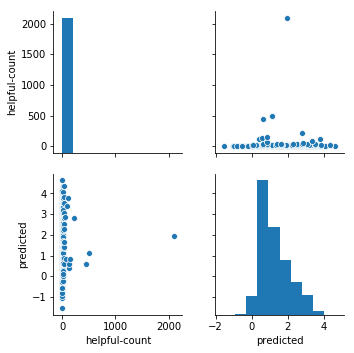

In [51]:
test_set_sorted = test_set.sort_values('helpful-count')
seaborn.pairplot(test_set_sorted[['helpful-count', 'predicted']])

The above graph takes a moment to interpret, but at least hints at the lack of relationship between the predicted and actual values.  Many reviews where the helpful-count was in the hundreds had a predicted value in the single digits.

A better way of visualizing this turned out to be a Seaborn pointplot of the actual and predicted helpfulness in each star category.  This shows the average value in each category, as well as the range, and reveals instances where the predicted values don't intersect at all with the actual values or have only very narrow overlap:

/Users/zoulvisia/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


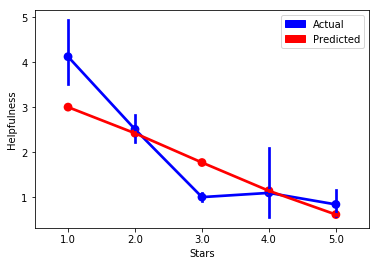

In [52]:
import matplotlib.patches as mpatches

fig, ax = plt.subplots()

seaborn.pointplot(x="overall-ratings", y="helpful-count", data=test_set, ax=ax, color="blue")
seaborn.pointplot(x="overall-ratings", y="predicted", data=test_set, ax=ax, color="red")

ax.set(ylabel='Helpfulness')
ax.set(xlabel='Stars')

red_patch = mpatches.Patch(color='red', label='Predicted')
blue_patch = mpatches.Patch(color='blue', label='Actual')
plt.legend(handles=[blue_patch, red_patch])

Interestingly, the average predicted helpfulness seems to go down quite linearly with the overall rating.

All in all, I would **not** trust or recommend this model.  Let's see if textual analysis fares any better.

### Model 2: Linear Classification - TF-IDF

Rather than trying to predict the exact helpfulness count of a review here, I decided to scale down the problem a bit and simply try and predict _whether or not it was considered helpful by more than one person_.  To do this, I added a boolean column to the data:

In [53]:
data['helpful'] = data['helpful-count'] > 1
X_train, X_test, y_train, y_test = model_selection.train_test_split(data[['pros', 'cons', 'advice-to-mgmt', 'helpful-count']], data['helpful'])

From here, it's pretty easy to set up a TF-IDF analysis on each of the text columns (pros, cons, advice) and use it to try and predict whether or not a review can be classed as "helpful".  I decided to compare Multinomial Naive Bayes, as seen in class, and Logistic Regression.

#### Model Setup - Multinomial Naive Bayes

In [54]:
from sklearn.feature_extraction import text
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer

In [55]:
pros_unicode = X_train['pros'].values.astype('U')
tfidf_pros = text.TfidfVectorizer(stop_words="english")
tfidf_pros.fit(pros_unicode)
analyzed_pros = tfidf_pros.transform(pros_unicode)
analyzed_pros_test = tfidf_pros.transform(X_test['pros'].values.astype('U'))

In [56]:
cons_unicode = X_train['cons'].values.astype('U')
tfidf_cons = text.TfidfVectorizer(stop_words="english")
tfidf_cons.fit(cons_unicode)
analyzed_cons = tfidf_cons.transform(cons_unicode)
analyzed_cons_test = tfidf_cons.transform(X_test['cons'].values.astype('U'))

In [57]:
advice_unicode = X_train['advice-to-mgmt'].values.astype('U')
tfidf_advice = text.CountVectorizer(stop_words="english")
tfidf_advice.fit(advice_unicode)
analyzed_advice = tfidf_advice.transform(advice_unicode)
analyzed_advice_test = tfidf_advice.transform(X_test['advice-to-mgmt'].values.astype('U'))

In [58]:
multinomial_nb_pros = MultinomialNB()
multinomial_nb_pros.fit(analyzed_pros, y_train)

multinomial_nb_cons = MultinomialNB()
multinomial_nb_cons.fit(analyzed_cons, y_train)

multinomial_nb_advice = MultinomialNB()
multinomial_nb_advice.fit(analyzed_advice, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

#### Model Validation & Analysis - Naive Bayes

Let's see how the model scores for each text column:

In [59]:
training_score = multinomial_nb_pros.score(analyzed_pros, y_train)
test_score = multinomial_nb_pros.score(analyzed_pros_test, y_test)

print("Score on the test set was {}, score on the training set was {} for prediction based on pros".format(training_score, test_score))

Score on the test set was 0.8301149152943964, score on the training set was 0.8188118225433868 for prediction based on pros


In [60]:
training_score = multinomial_nb_cons.score(analyzed_cons, y_train)
test_score = multinomial_nb_cons.score(analyzed_cons_test, y_test)

print("Score on the test set was {}, score on the training set was {} for prediction based on cons".format(training_score, test_score))

Score on the test set was 0.8293251194566205, score on the training set was 0.8192856719777291 for prediction based on cons


In [61]:
training_score = multinomial_nb_advice.score(analyzed_advice, y_train)
test_score = multinomial_nb_advice.score(analyzed_advice_test, y_test)

print("Score on the test set was {}, score on the training set was {} for prediction based on advice".format(training_score, test_score))

Score on the test set was 0.8606800142163251, score on the training set was 0.8220695374044897 for prediction based on advice


The scores look pretty good on both the test and training set!  But let's also run a few examples, just narrowing down to advice for brevity's sake:

In [62]:
nonsense = "twas brillig and the slithy toves did gyre and gimble in the wabe"
unhelpful = "Management, you all suck!"
helpful = "Don't make promises you can't keep, let your employees know they're valued, and increase compensation to market rates"

analyzed_examples = tfidf_advice.transform([nonsense, unhelpful, helpful])
multinomial_nb_advice.predict_proba(analyzed_examples)

array([[0.82003079, 0.17996921],
       [0.78784834, 0.21215166],
       [0.94910941, 0.05089059]])

Here, unfortunately, the model shows some cracks - it rates the nonsense quote from Jabberwocky by Lewis Carrol as having almost the same probability of being helpful as the aggressively unhelpful review, and rates the actually-helpful text dramatically lower than both of the others!

Does logistic regression fall victim to the same issue?

#### Model Setup - Logistic Regression

In [63]:
from sklearn import linear_model
helpfulness_model_pros = linear_model.LogisticRegression(solver='liblinear')
helpfulness_model_pros.fit(analyzed_pros, y_train)

helpfulness_model_cons = linear_model.LogisticRegression(solver='liblinear')
helpfulness_model_cons.fit(analyzed_cons, y_train)

helpfulness_model_advice = linear_model.LogisticRegression(solver='liblinear')
helpfulness_model_advice.fit(analyzed_advice, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Validation & Analysis - Logistic Regression

We check the model score for pros, cons, and advice:

In [64]:
helpfulness_model_pros.score(analyzed_pros_test, y_test)

0.8239649351418586

In [65]:
helpfulness_model_cons.score(analyzed_cons_test, y_test)

0.8404312029852514

In [66]:
helpfulness_model_advice.score(analyzed_advice_test, y_test)

0.8199372149499496

In [67]:
helpfulness_model_advice.predict_proba(analyzed_examples)

array([[0.87663044, 0.12336956],
       [0.76003536, 0.23996464],
       [0.79689799, 0.20310201]])

In this toy spot-check example, logistic regression at least rates the nonsense Jabberwocky example lower than the other two, but again can't seem to differentiate too well between the unhelpful and helpful examples (and would reject the helpful example as "unhelpful").

## 6. Conclusions

Honestly, all of the models I evaluated left me with significant doubt in their ability to accurately predict the helpfulness of reviews out in the wild.  Classification based on analysis clearly fared much better than linear regression based on star ratings, so if I had to pick one I would go with that.  However, the textual analysis bombed on the on-the-spot examples I dreamed up.

Admittedly, this doesn't mean that the textual analysis models would perform poorly on a large scale (their performance on the test set, in fact, suggests the opposite), but still, rating the first line of the Jabberwocky as more likely to be helpful advice than "Don't make promises you can't keep, let your employees know they're valued, and increase compensation to market rates" doesn't inspire much confidence.  Perhaps there are other relationships in this dataset that would yield more accurate results - or, perhaps, the helpfulness of a Glassdoor review is determined by more subjective, alchemical factors.